In [1]:
#import data analytics libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle


In [2]:
#read in the dataset
dataset = pd.read_csv('outwx_fine_cleaned21.csv')
dataset.head()


,ID,Lat,Lng,OutTime,Temp,Precip,WindSpd,WindGust,Press,Humid,Dew,Outage
0,0,-0.569174,34.862274,08/02/2021 17:00,26,4.2,5,5,1008,43,12,0
1,1,0.059492,34.285599,13/11/2020 08:00,21,0.7,7,10,1015,71,15,0
2,2,-1.267577,36.842441,14/04/2021 17:00,21,0.7,12,18,1012,72,15,0
3,3,-1.307644,36.778698,22/12/2020 09:00,20,0.0,18,21,1017,57,12,0
4,4,-1.037109,36.920895,03/04/2021 04:00,16,0.2,4,6,1015,95,15,0


In [3]:
# describing the dataset(mean, count, std dev, percentiles etc...)
dataset.describe(include='all')


,ID,Lat,Lng,OutTime,Temp,Precip,WindSpd,WindGust,Press,Humid,Dew,Outage
count,270152.000000,270152.000000,270152.000000,270152,270152.000000,270152.000000,270152.000000,270152.000000,270152.000000,270152.000000,270152.000000,270152.000000
unique,NaN,NaN,NaN,22276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,13/05/2020 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,135075.500000,-1.183763,36.766015,NaN,20.169186,0.524055,10.961392,15.573203,1013.932227,69.929499,13.733765,0.040096
std,77986.309298,0.869119,1.019543,NaN,3.987640,2.306747,5.959513,9.144710,2.666514,18.017628,3.202991,0.196185
min,0.000000,-4.644477,33.976040,NaN,4.000000,0.000000,0.000000,0.000000,1003.000000,11.000000,-8.000000,0.000000
25%,67537.750000,-1.304534,36.714561,NaN,17.000000,0.000000,6.000000,9.000000,1012.000000,57.000000,12.000000,0.000000
50%,135075.500000,-1.253145,36.822781,NaN,20.000000,0.000000,10.000000,14.000000,1014.000000,73.000000,14.000000,0.000000
75%,202613.250000,-1.140089,36.919720,NaN,23.000000,0.100000,15.000000,21.000000,1016.000000,85.000000,15.000000,0.000000


In [4]:
#rermoving "OutTime, ID, Lat & Lng" since they are no longer needed in this context
del dataset['OutTime']
del dataset['ID']

del dataset['Lat']
del dataset['Lng']

dataset.head()

,Temp,Precip,WindSpd,WindGust,Press,Humid,Dew,Outage
0,26,4.2,5,5,1008,43,12,0
1,21,0.7,7,10,1015,71,15,0
2,21,0.7,12,18,1012,72,15,0
3,20,0.0,18,21,1017,57,12,0
4,16,0.2,4,6,1015,95,15,0


In [5]:
#deleting "WindSpd" and "Dew" since they do not heavily correlate to th dataset
del dataset['WindSpd']
del dataset['Dew']

dataset.head()

,Temp,Precip,WindGust,Press,Humid,Outage
0,26,4.2,5,1008,43,0
1,21,0.7,10,1015,71,0
2,21,0.7,18,1012,72,0
3,20,0.0,21,1017,57,0
4,16,0.2,6,1015,95,0


In [6]:
# creating input features and target variables
X= dataset.iloc[:,0:5]
y= dataset.iloc[:,5]

X.head()


,Temp,Precip,WindGust,Press,Humid
0,26,4.2,5,1008,43
1,21,0.7,10,1015,71
2,21,0.7,18,1012,72
3,20,0.0,21,1017,57
4,16,0.2,6,1015,95


In [7]:
# #standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X
y.tail()


270147    0
270148    0
270149    0
270150    1
270151    0
Name: Outage, dtype: int64

In [10]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import Tf-idf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

# Import the train test split
from sklearn.model_selection import train_test_split

# To evaluate our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Initialize the DT
dtree = DecisionTreeClassifier(random_state=0, max_depth=2)

# Fit the model
dtree = dtree.fit(X_train, y_train)

# Print the accuracy score
print("Accuracy:",dtree.score(X_test, y_test))

Accuracy: 0.9914308452555015


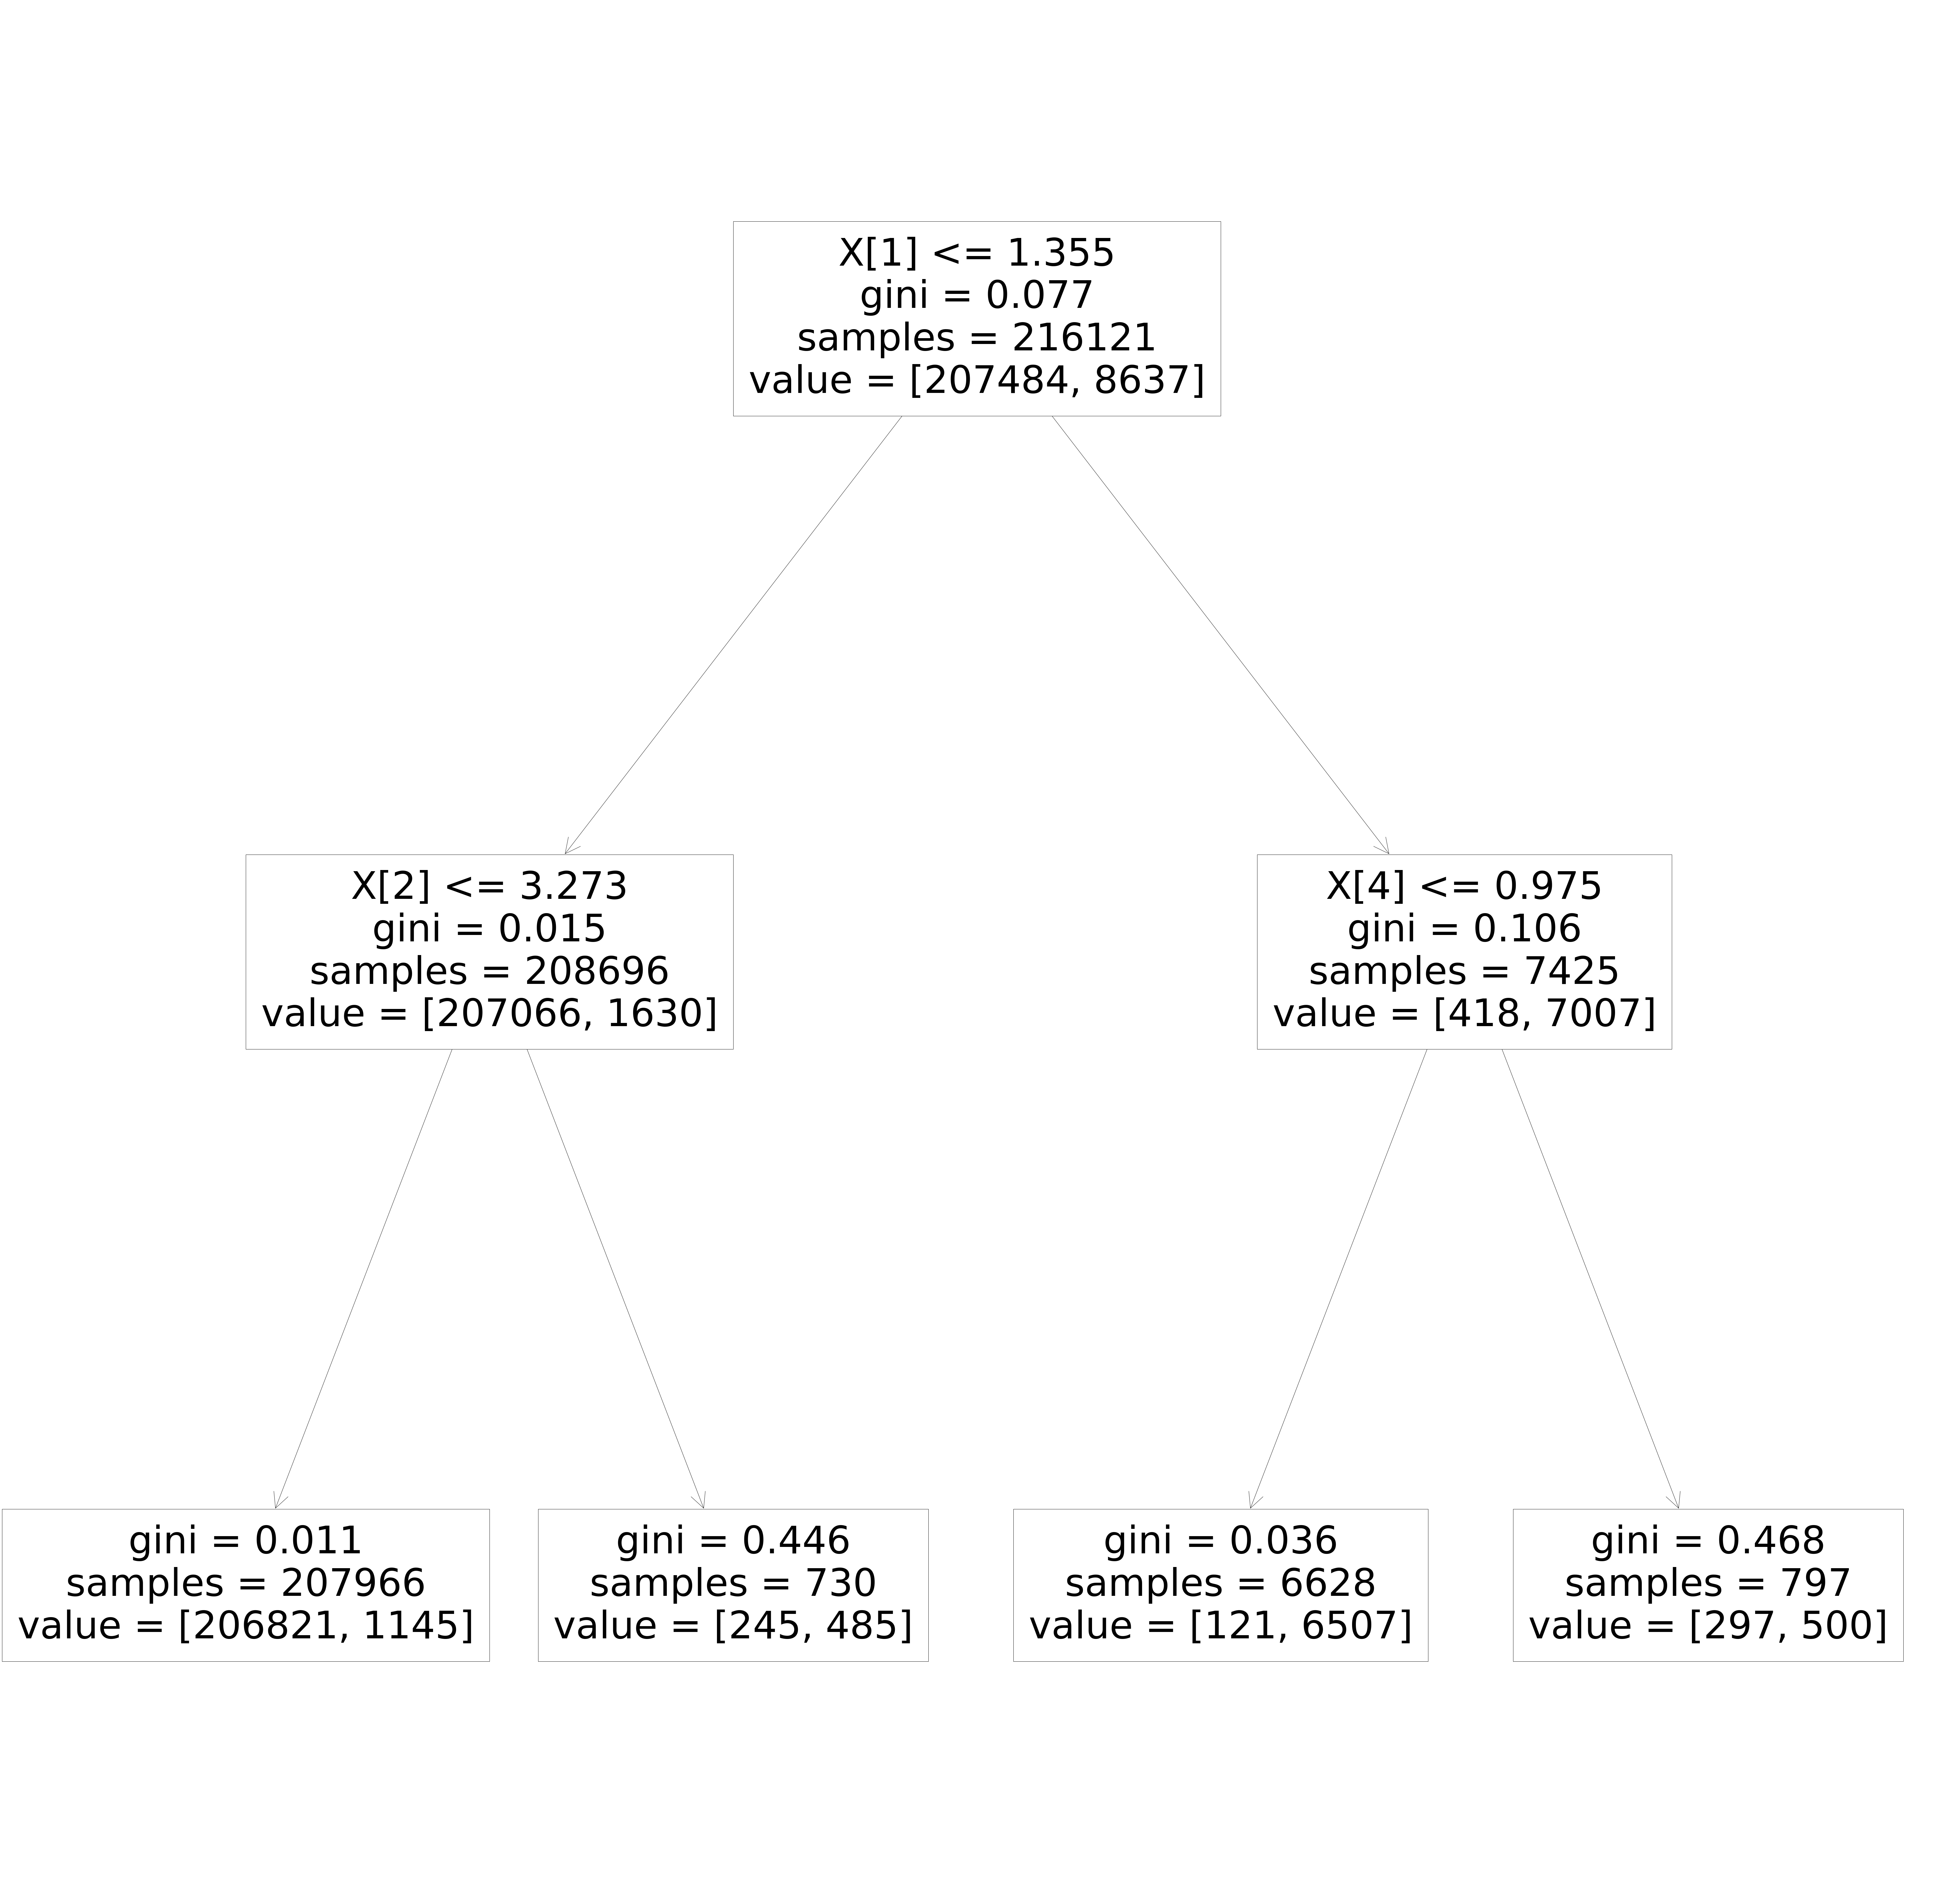

In [13]:
from sklearn import tree

plt.figure(figsize=(120,120))
tree.plot_tree(dtree) 
plt.savefig('tree_high_dpi', dpi=100)

In [14]:
# Predict the labels
y_pred = dtree.predict(X_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)


# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)


Confusion Matrix

[[51660   176]
 [  287  1908]]


Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     51836
           1       0.92      0.87      0.89      2195

    accuracy                           0.99     54031
   macro avg       0.96      0.93      0.94     54031
weighted avg       0.99      0.99      0.99     54031



In [15]:
#passing a Numpy array of test weather variables and seeing the probabilities produced. 
a= np.array([[24.0,5.0,9.0,1010.0,52.0],[16.0,2.0,8.0,1015.0,95.0]])
print(dtree.predict(a))

[1 1]
